In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('onlinefoods.csv') # uploading value file.
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [6]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [7]:
data.describe(include='O')

,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Output,Feedback,Unnamed: 12
count,388,388,388,388,388,388,388,388
unique,2,3,4,5,5,2,2,2
top,Male,Single,Student,No Income,Graduate,Yes,Positive,Yes
freq,222,268,207,187,177,301,317,301


In [8]:
d_float=list(data.select_dtypes(float).columns)
d_float

['latitude', 'longitude']

In [9]:
d_int=list(data.select_dtypes(int).columns)
d_int

['Age', 'Family size', 'Pin code']

In [10]:
d_object=list(data.select_dtypes(object).columns)
d_object

['Gender',
 'Marital Status',
 'Occupation',
 'Monthly Income',
 'Educational Qualifications',
 'Output',
 'Feedback',
 'Unnamed: 12']

In [12]:
for columns in d_object:
    print (f'{columns}:{data[columns].unique()}')

Gender:['Female' 'Male']
Marital Status:['Single' 'Married' 'Prefer not to say']
Occupation:['Student' 'Employee' 'Self Employeed' 'House wife']
Monthly Income:['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
Educational Qualifications:['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']
Output:['Yes' 'No']
Feedback:['Positive' 'Negative ']
Unnamed: 12:['Yes' 'No']


## EDA

In [13]:
da=data[['Age', 'Family size', 'Pin code','latitude', 'longitude']]

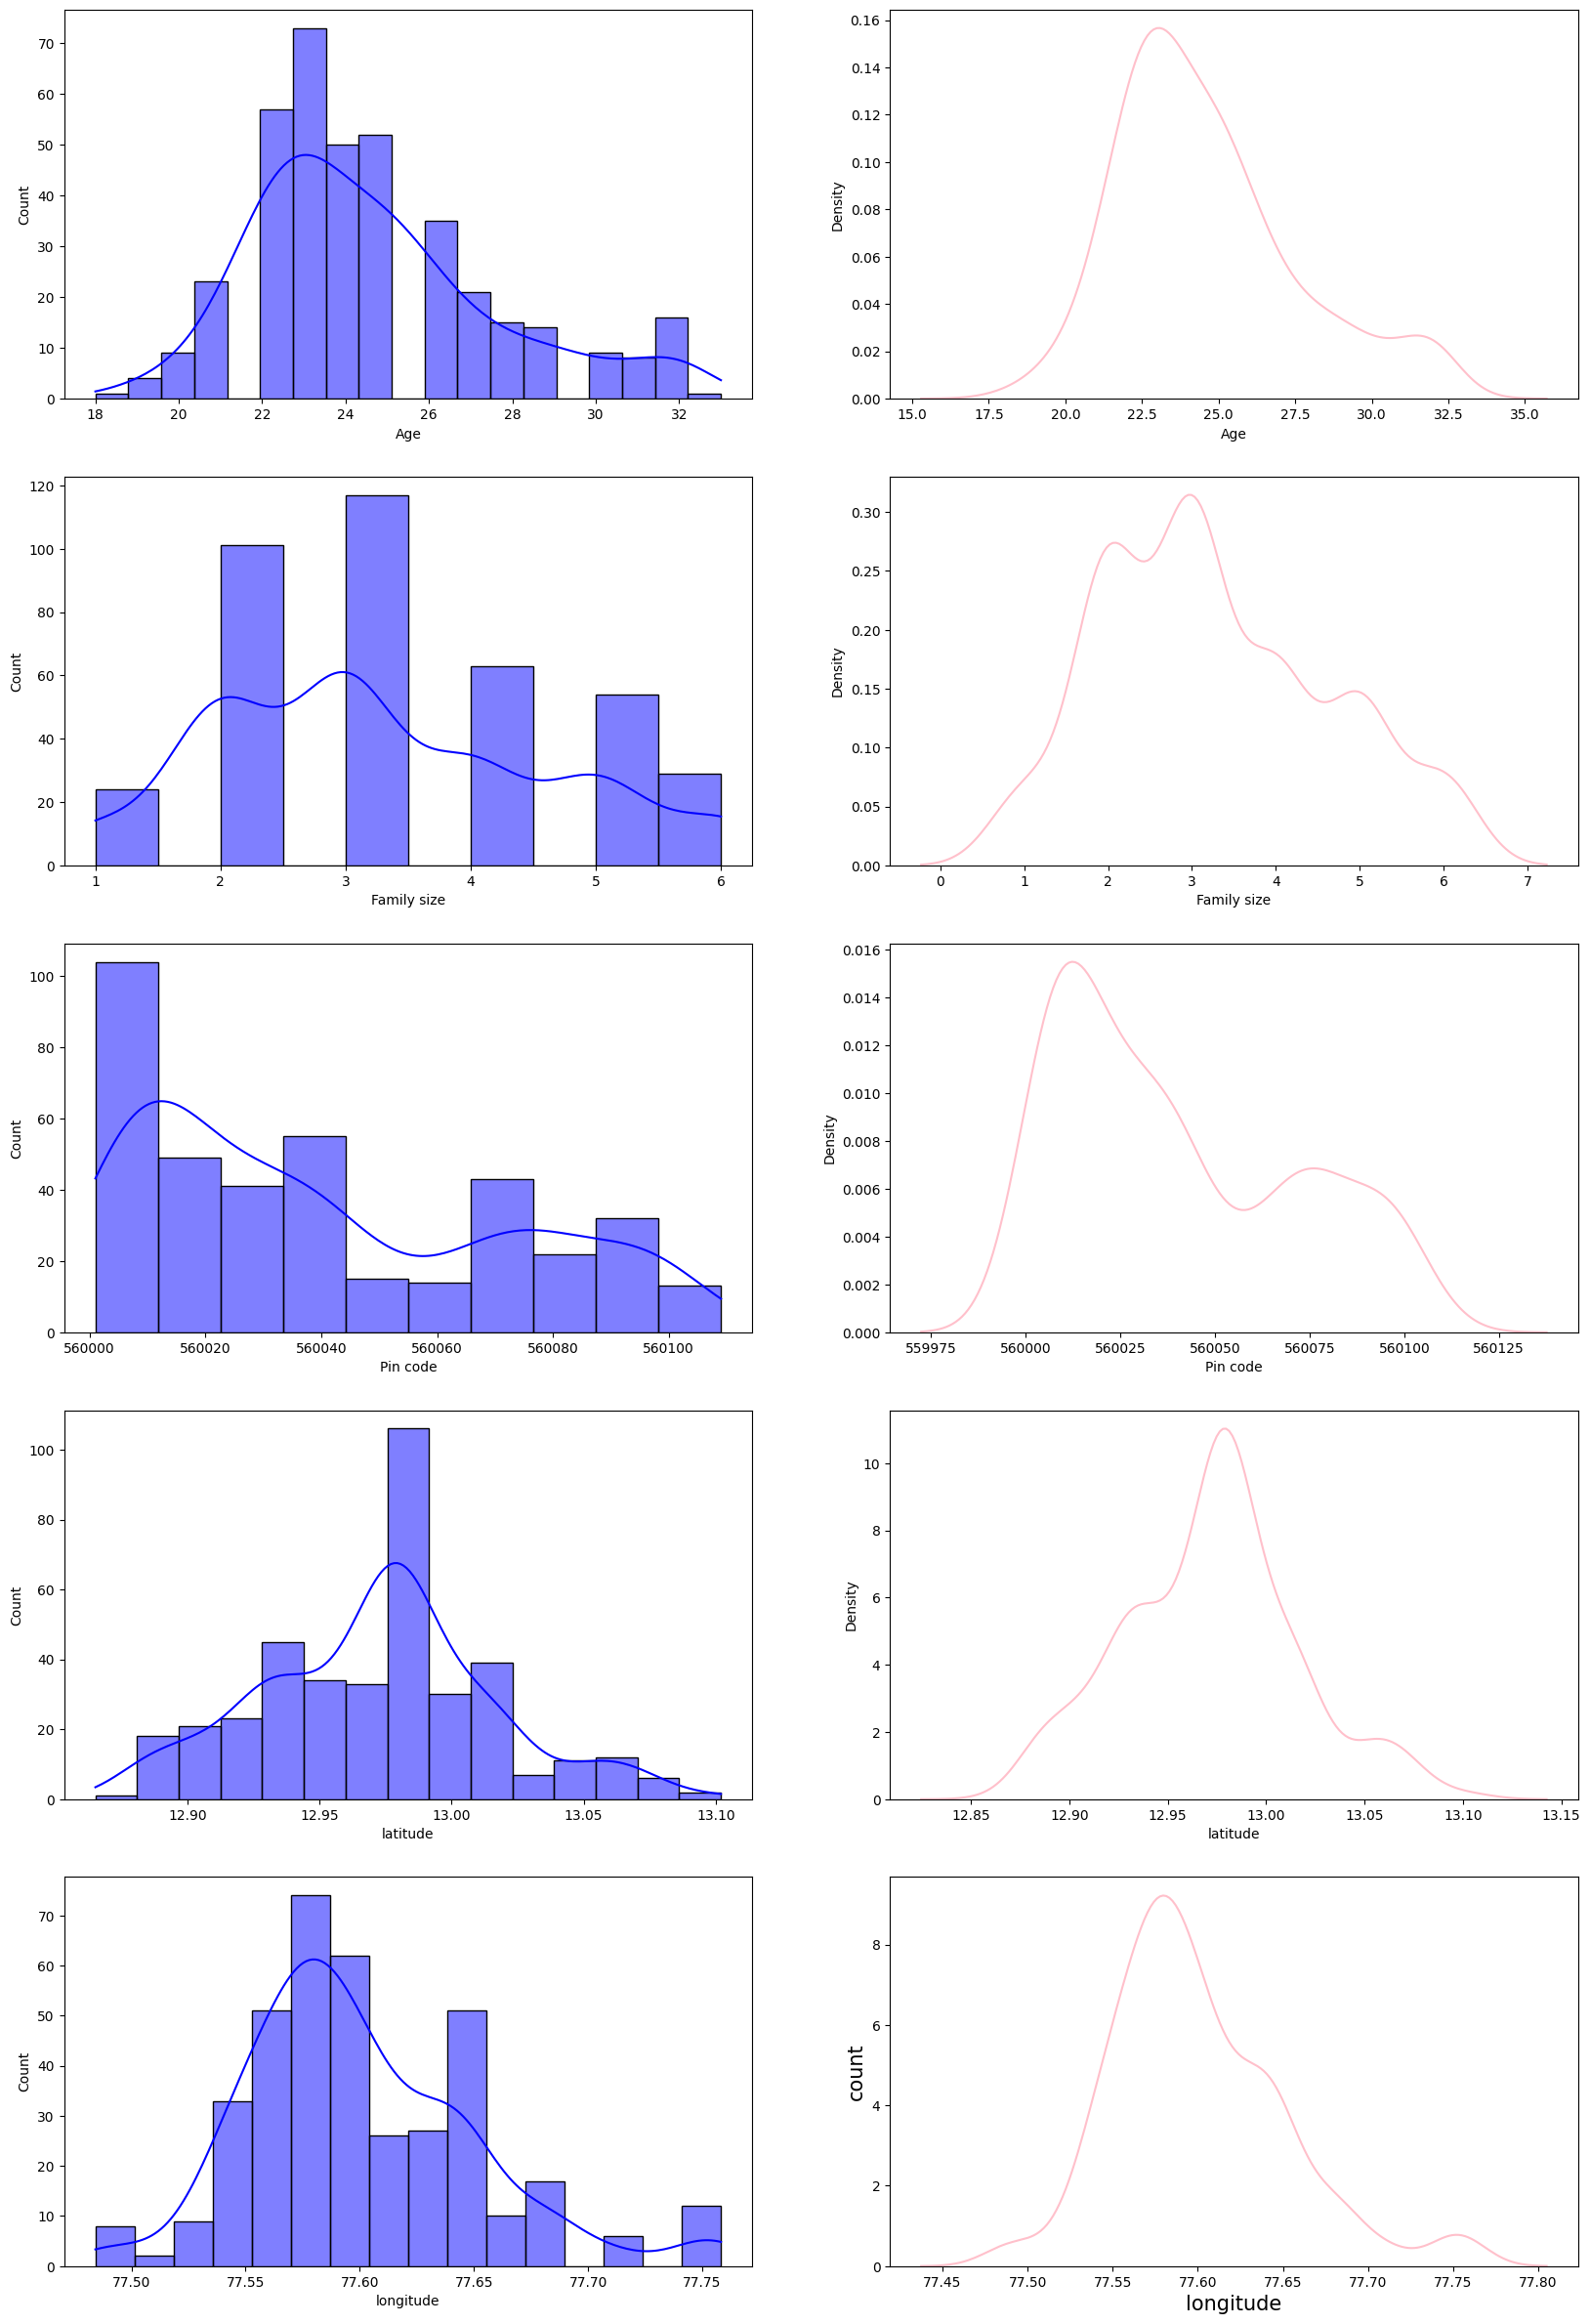

In [46]:
fig,ax=plt.subplots(5,2,figsize=(20,30))
m,n=0,0

for col in da:
    sns.histplot(data[col],kde=True,color='b',ax=ax[m][n])
    sns.distplot(data[col],hist=False,color='pink',ax=ax[m][n+1])
    plt.xlabel(col,fontsize=15)
    plt.ylabel('count',fontsize=15)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    m+=1

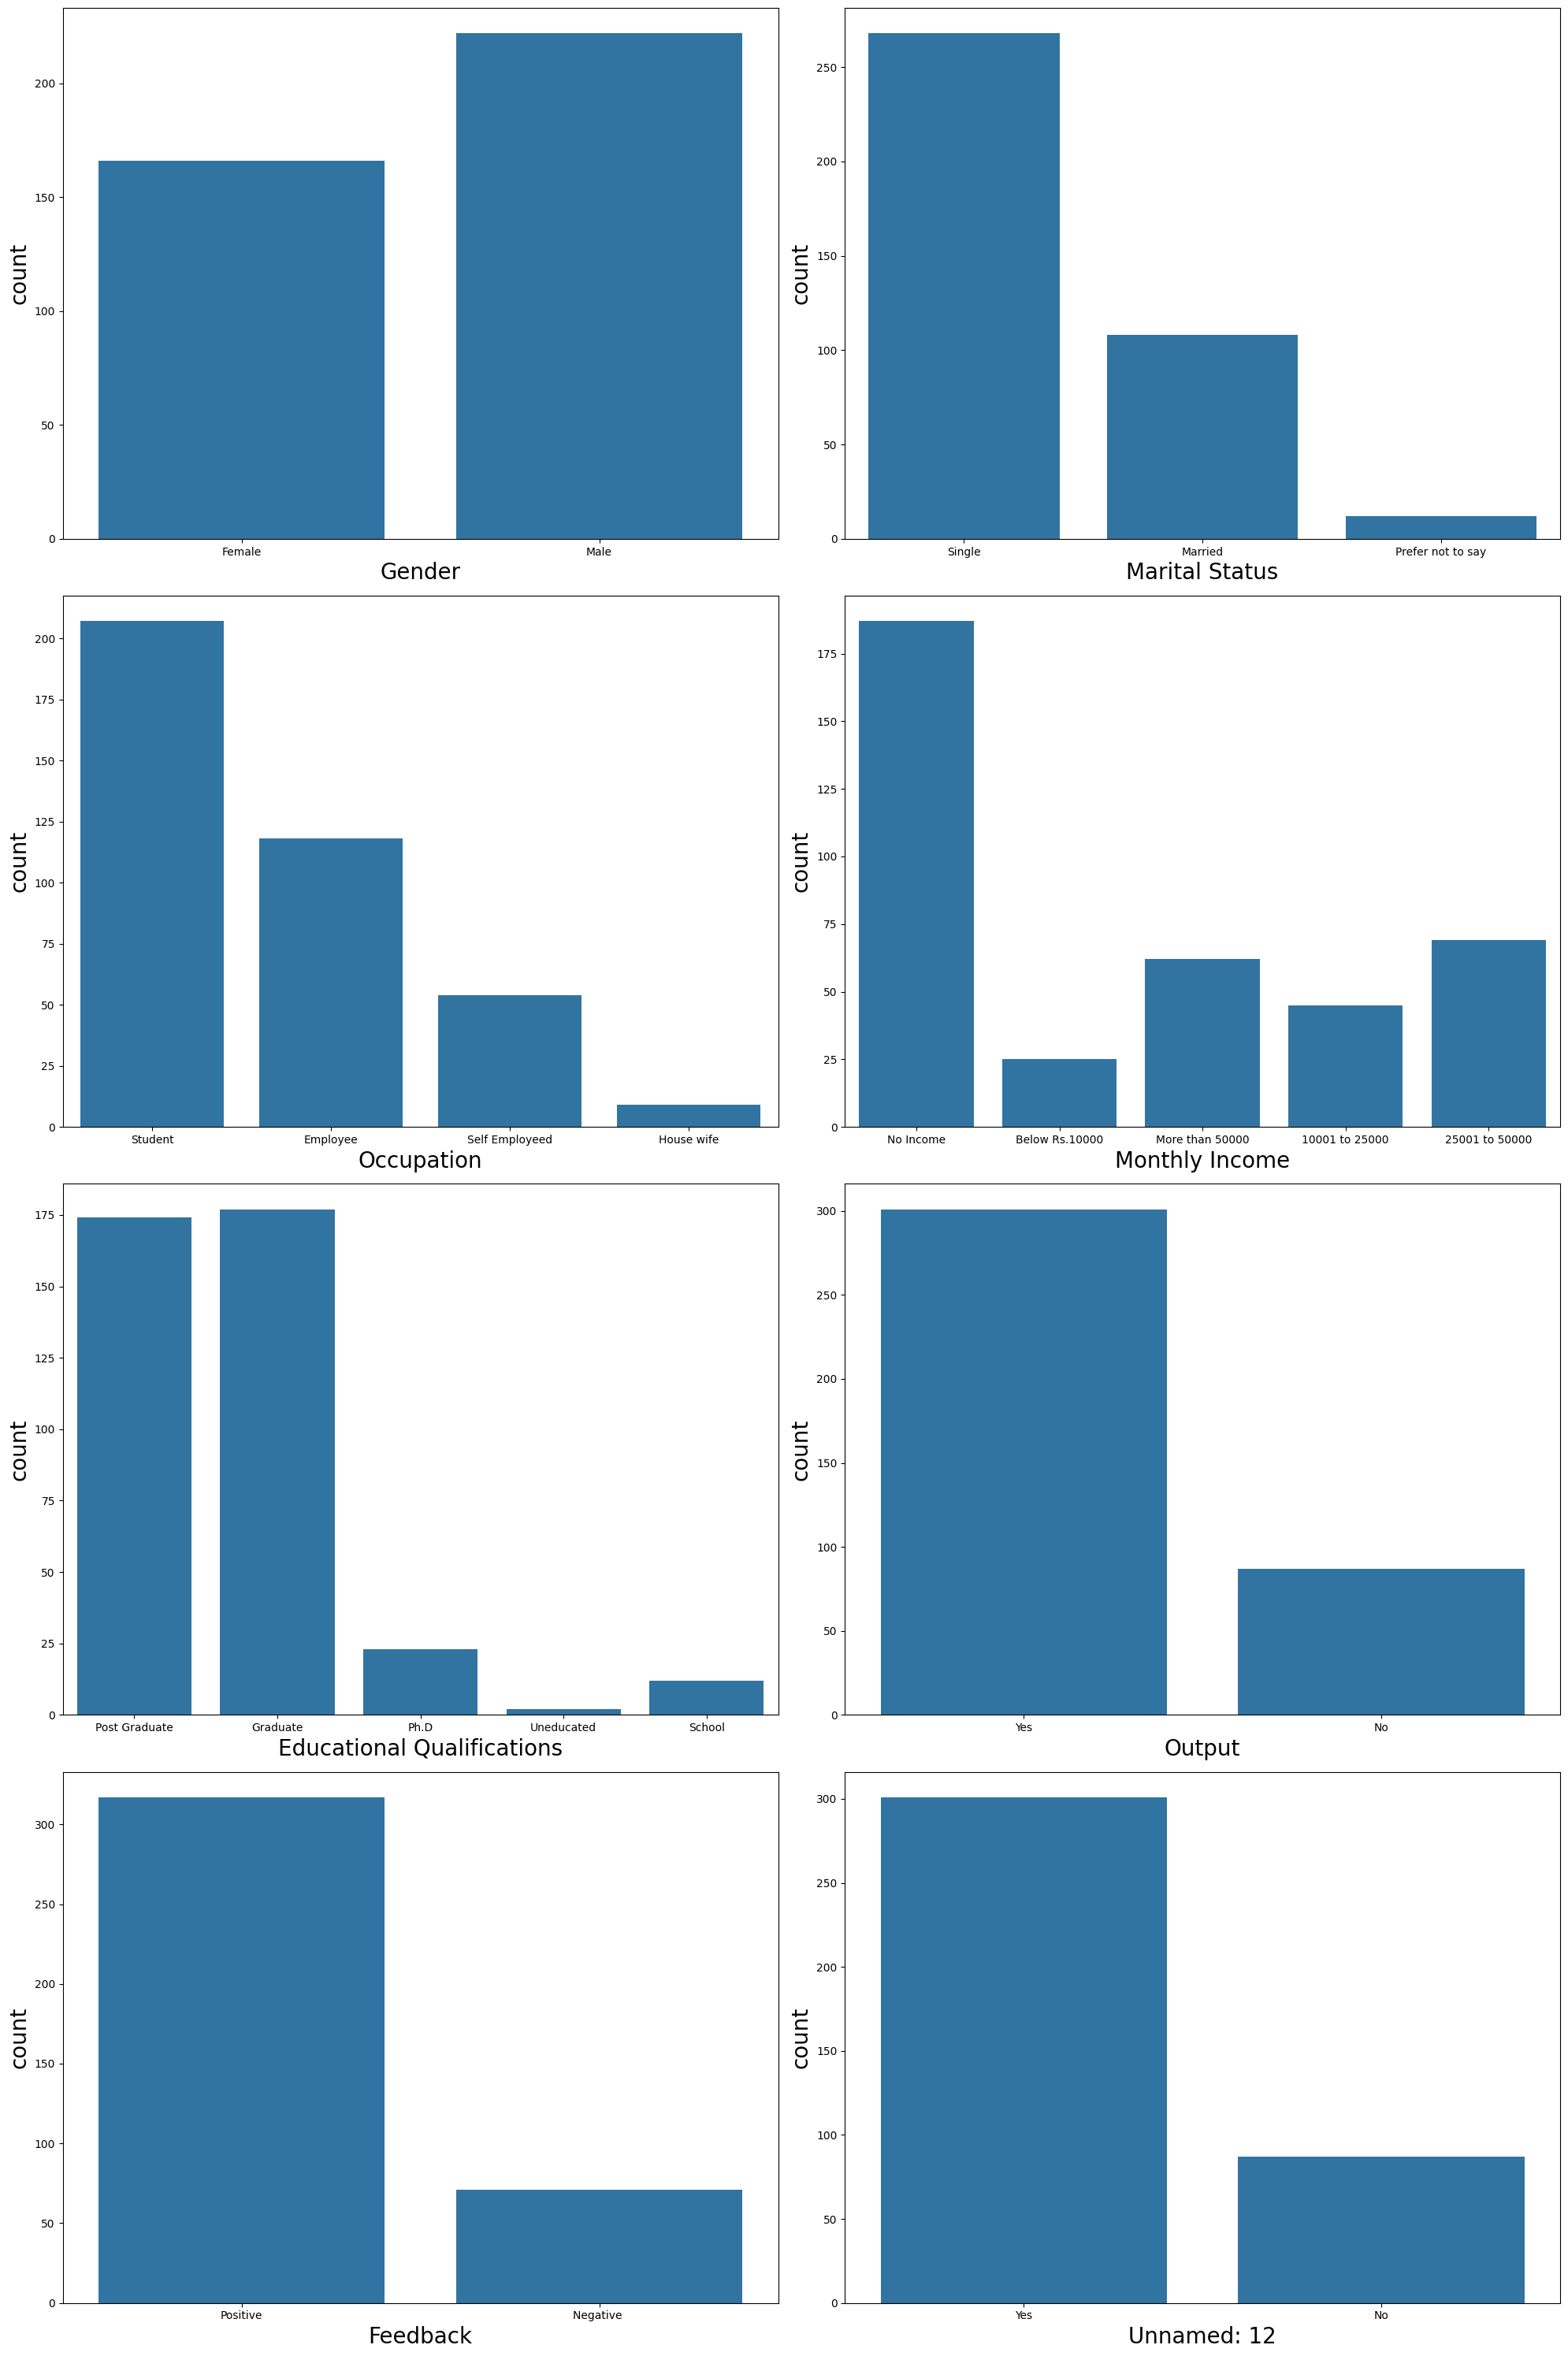

In [22]:
plt.figure(figsize=(20,30))
plt_num=1

for col in d_object:
    if plt_num<=8:
        ax=plt.subplot(4,2,plt_num)

        ax=sns.countplot(x=data[col],data=data)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count',fontsize=20)
        plt_num+=1

plt.tight_layout()

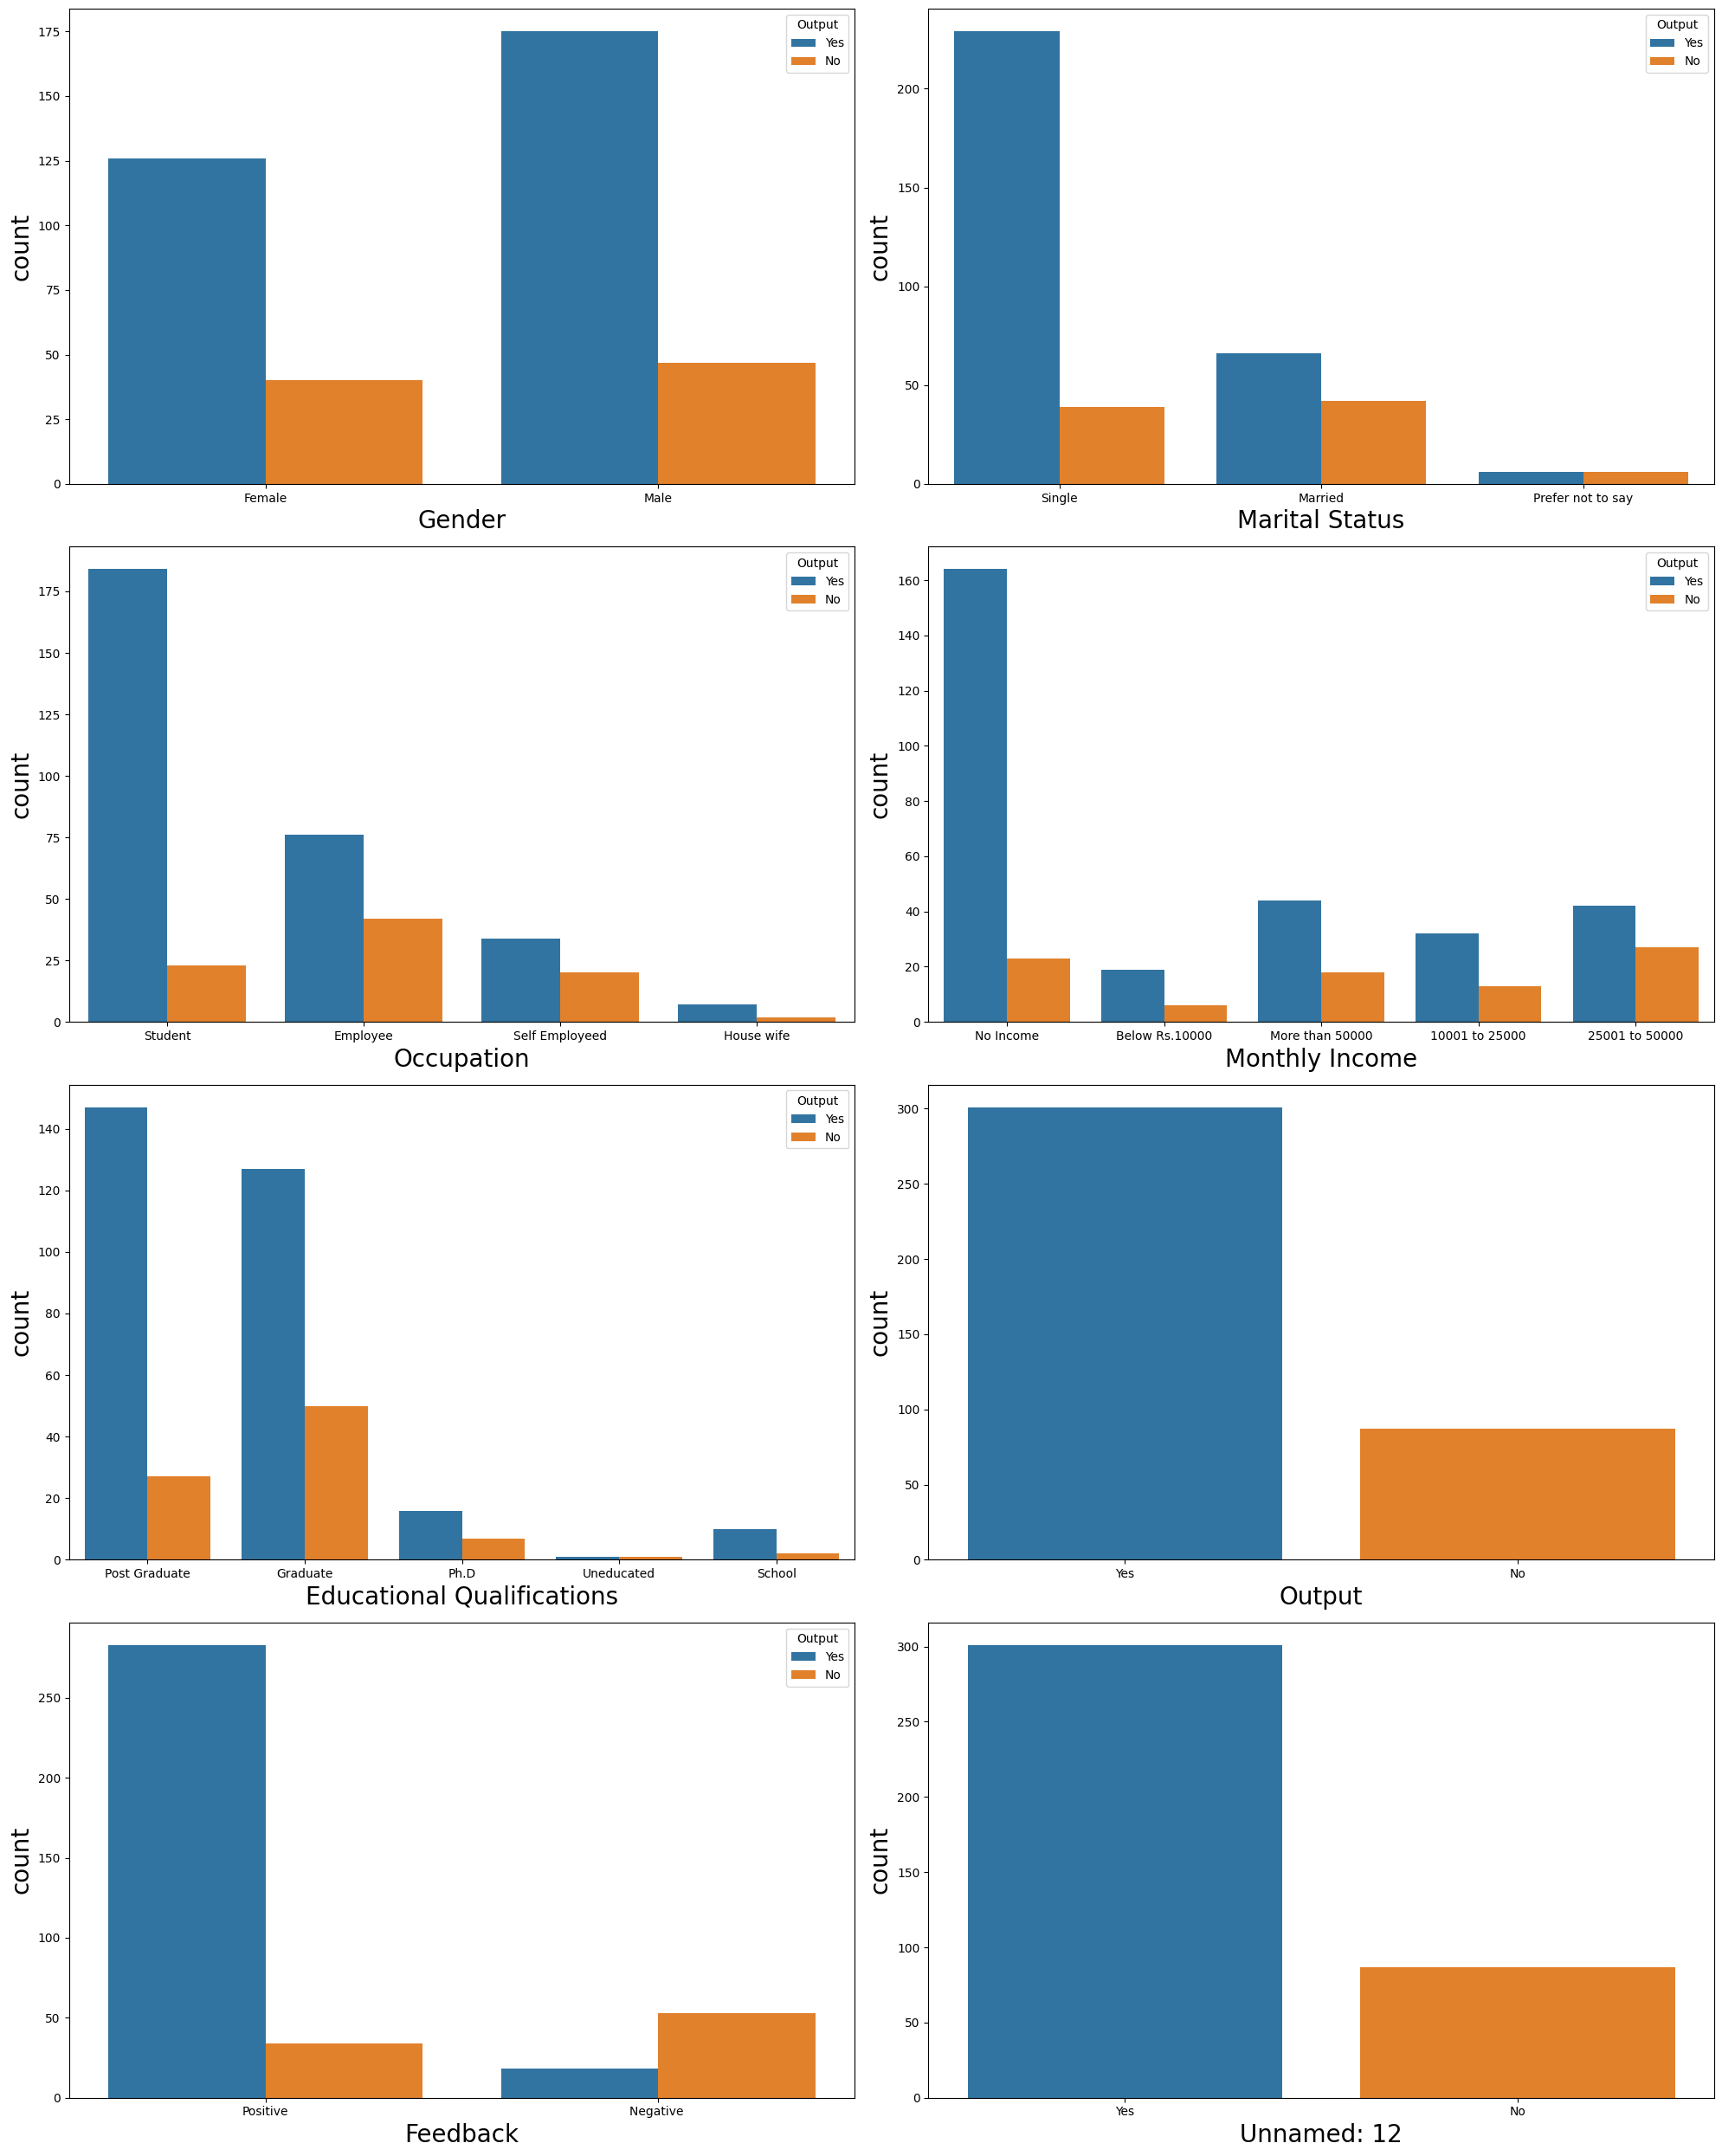

In [23]:
plt.figure(figsize=(20,25))
plt_num=1

for col in d_object:
    if plt_num<=8:
        ax=plt.subplot(4,2,plt_num)

        ax=sns.countplot(x=data[col],data=data,hue='Output')
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count',fontsize=20)
        plt_num+=1

plt.tight_layout()

In [25]:
data['Gender'].value_counts()

Gender
Male      222
Female    166
Name: count, dtype: int64

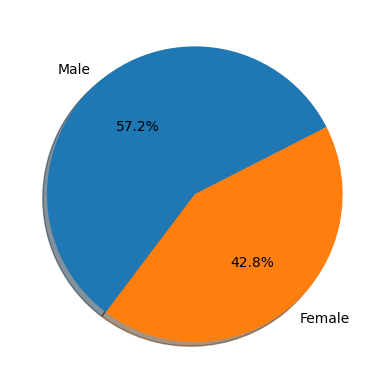

In [27]:
Gender=['Male',"Female"]
value=[222,166]
plt.pie(value, labels=Gender,startangle=27,shadow=True,autopct='%2.1f%%')
plt.show()

In [33]:
data['Occupation'].value_counts()

Occupation
Student           207
Employee          118
Self Employeed     54
House wife          9
Name: count, dtype: int64

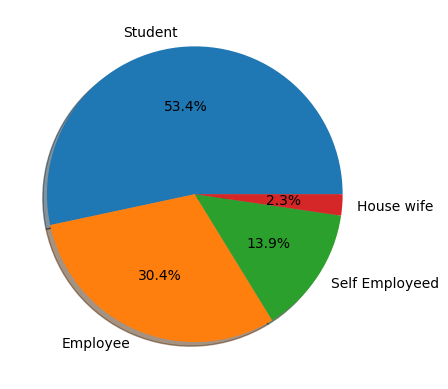

In [36]:
Occupation=['Student' ,'Employee' ,'Self Employeed' ,'House wife']
value=[207,118,54,9]
plt.pie(value, labels=Occupation,shadow=True,autopct='%2.1f%%')
plt.show()

In [37]:
data['Marital Status'].value_counts()

Marital Status
Single               268
Married              108
Prefer not to say     12
Name: count, dtype: int64

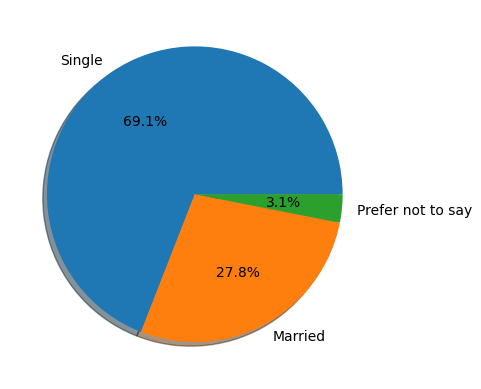

In [39]:
Status=['Single' ,'Married', 'Prefer not to say']
value=[268,108,12]
plt.pie(value, labels=Status,shadow=True,autopct='%2.1f%%')
plt.show()

In [40]:
data['Educational Qualifications'].value_counts()

Educational Qualifications
Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: count, dtype: int64

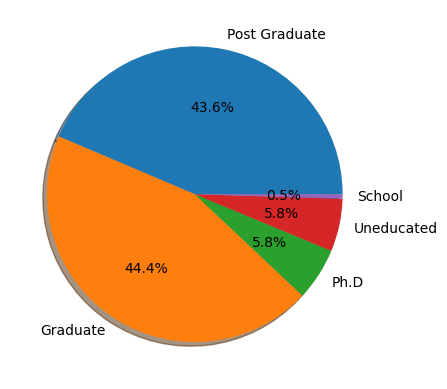

In [41]:
Educational=['Post Graduate' ,'Graduate' ,'Ph.D' ,'Uneducated' ,'School']
value=[174,177,23,23,2]
plt.pie(value, labels=Educational,shadow=True,autopct='%2.1f%%')
plt.show()

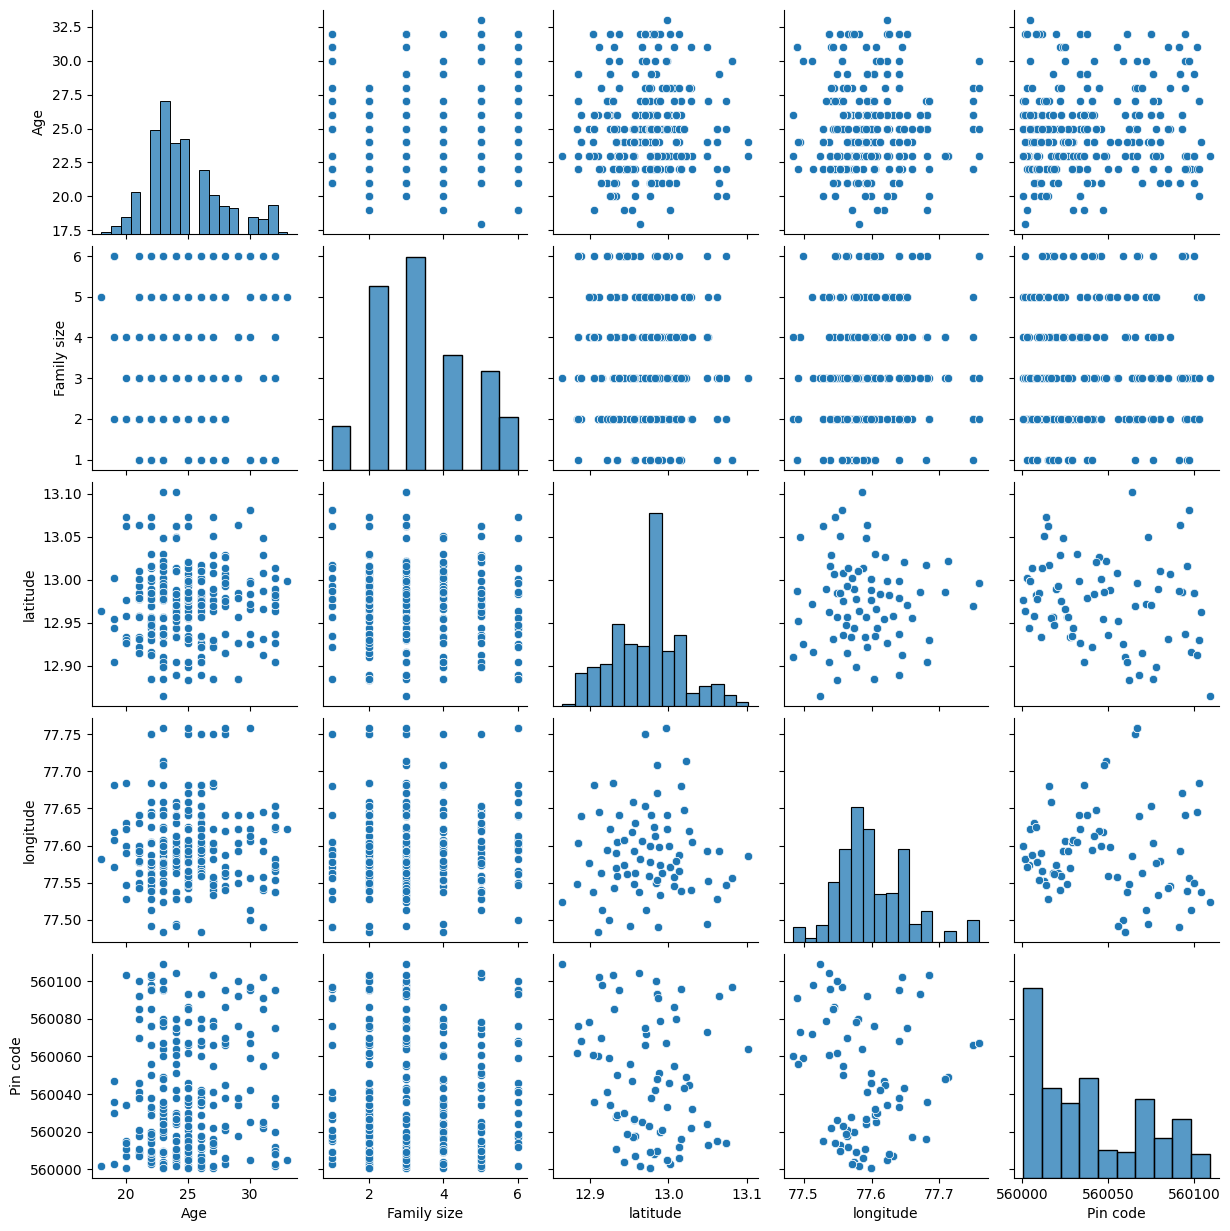

In [42]:
sns.pairplot(data=data)

In [43]:
data.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

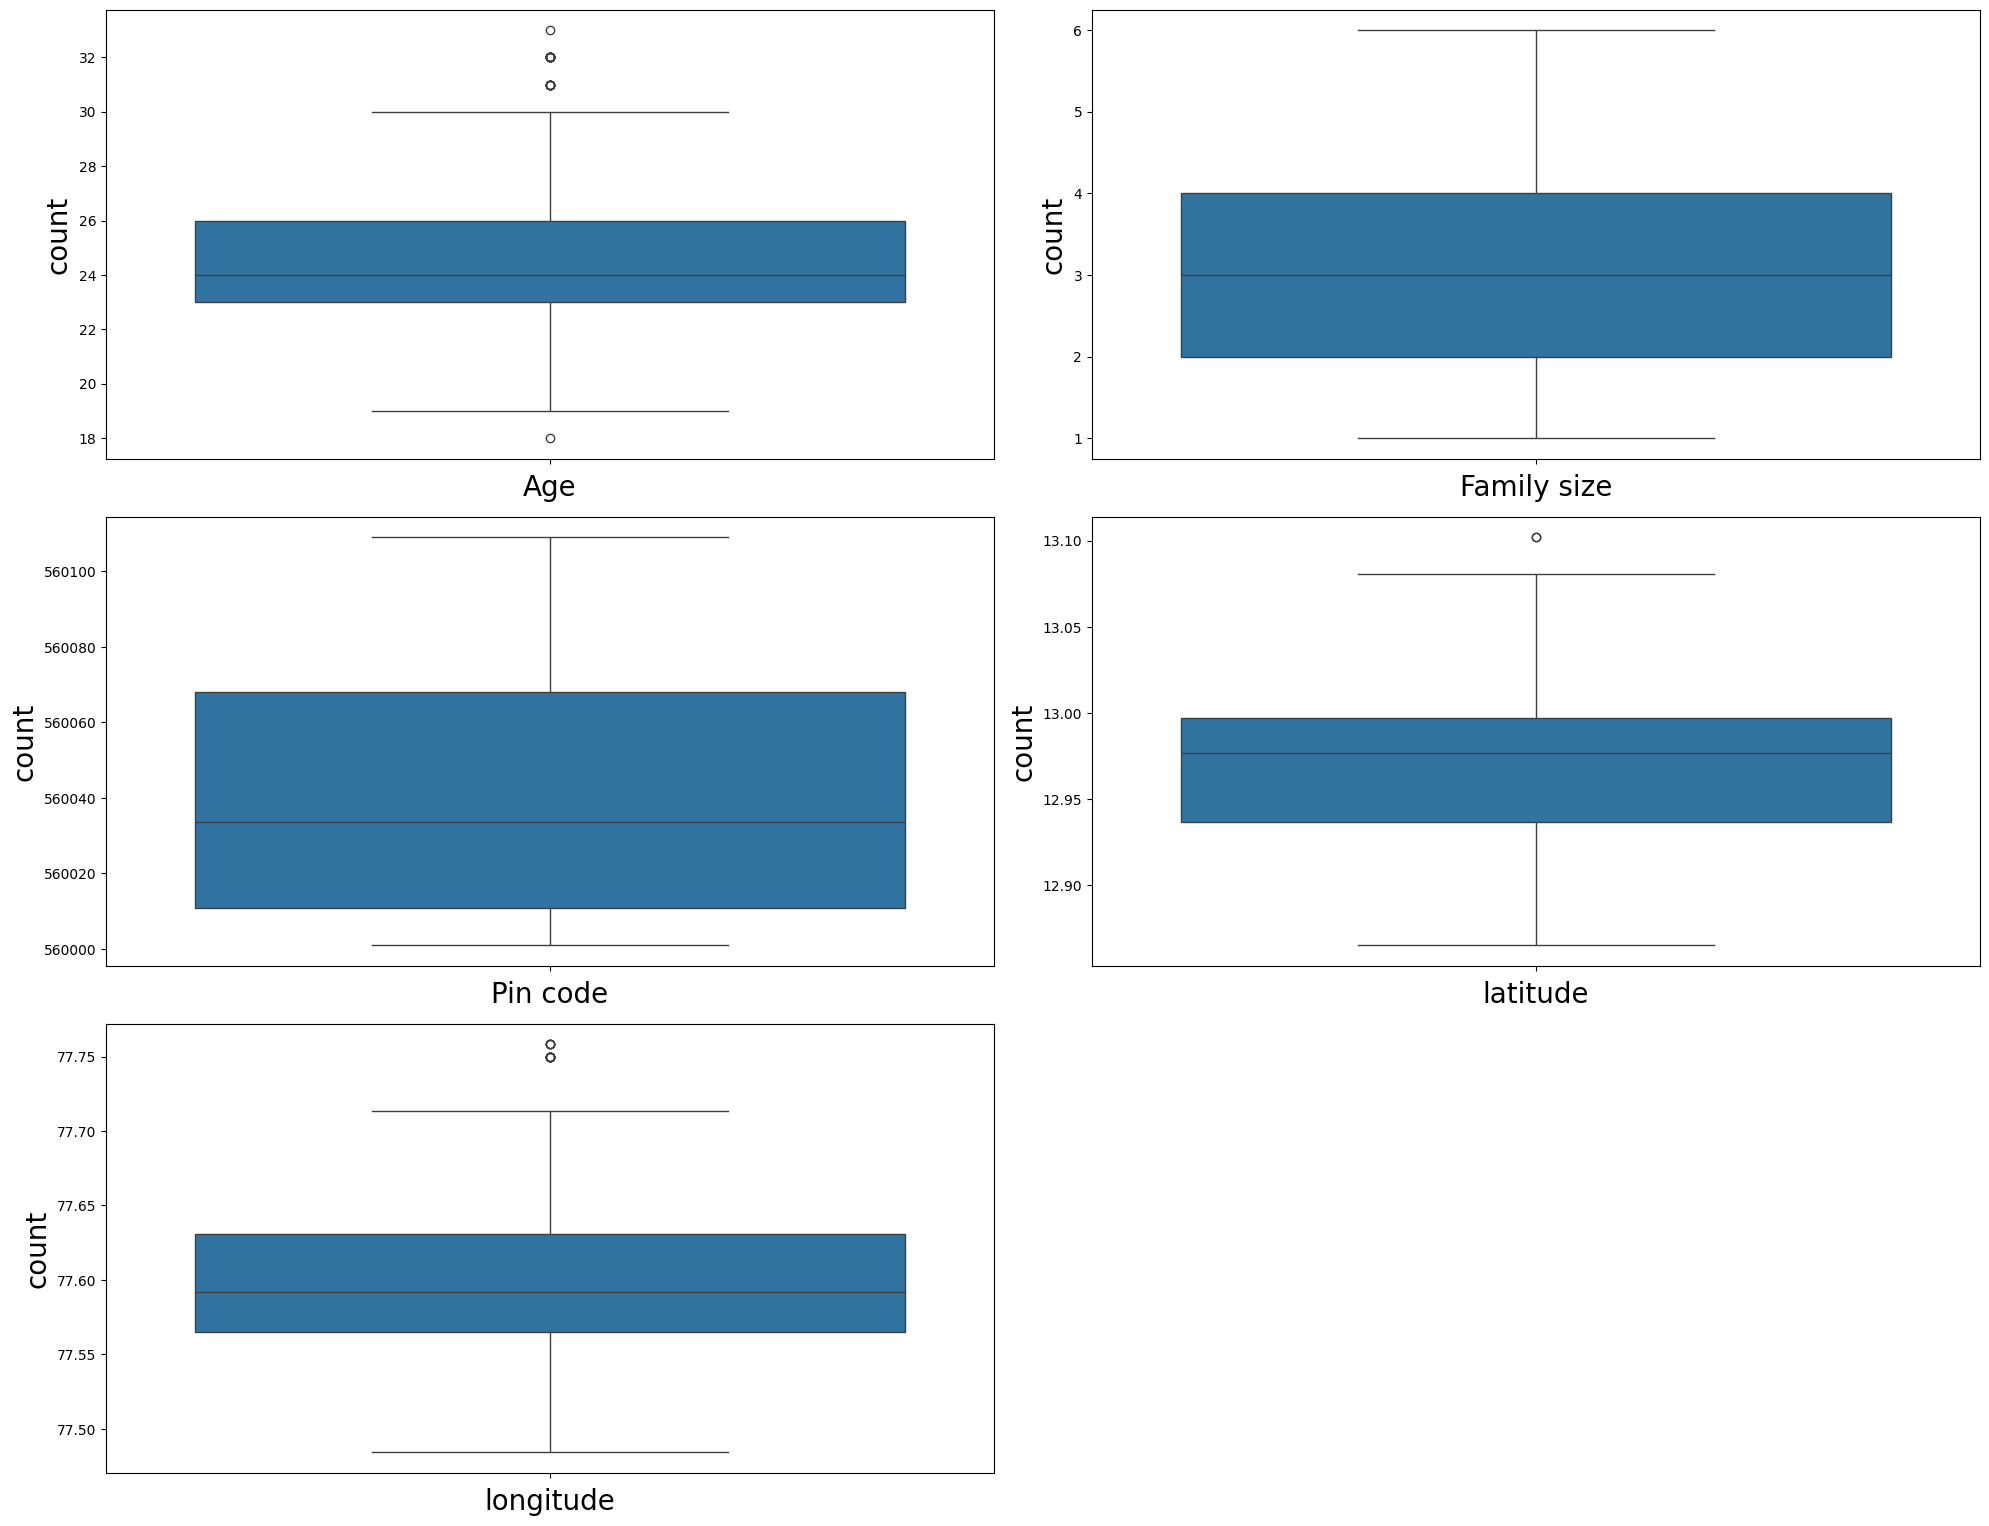

In [44]:
plt.figure(figsize=(20,20))
plot=1
for col in da:
    if plot<=8:
        ax=plt.subplot(4,2,plot)
        sns.boxplot(data[col])
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plot+=1
plt.tight_layout()

In [47]:
d_object

['Gender',
 'Marital Status',
 'Occupation',
 'Monthly Income',
 'Educational Qualifications',
 'Output',
 'Feedback',
 'Unnamed: 12']

In [50]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Marital Status']=le.fit_transform(data['Marital Status'])
data['Occupation']=le.fit_transform(data['Occupation'])
data['Monthly Income']=le.fit_transform(data['Monthly Income'])
data['Educational Qualifications']=le.fit_transform(data['Educational Qualifications'])
data['Feedback']=le.fit_transform(data['Feedback'])
data['Unnamed: 12']=le.fit_transform(data['Unnamed: 12'])
data['Output']=le.fit_transform(data['Output'])

In [70]:
data.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [71]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
data[['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Feedback', 'Unnamed: 12']]=mn.fit_transform(data[['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Feedback', 'Unnamed: 12']])

In [72]:
data.corr()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
Age,1.000000,0.062038,-0.663269,-0.579334,-0.309798,0.009240,0.169982,0.006595,0.047500,0.137294,-0.248052,-0.198170,-0.248052
Gender,0.062038,1.000000,0.031781,-0.004934,0.005281,-0.082837,-0.082488,-0.046424,-0.059175,0.035685,0.034701,-0.045486,0.034701
Marital Status,-0.663269,0.031781,1.000000,0.557267,0.297593,0.086039,-0.207170,0.053687,-0.032214,-0.099405,0.268759,0.188500,0.268759
Occupation,-0.579334,-0.004934,0.557267,1.000000,0.620219,0.183207,-0.056563,0.112430,-0.193483,-0.138857,0.253506,0.195984,0.253506
Monthly Income,-0.309798,0.005281,0.297593,0.620219,1.000000,0.145041,0.018184,0.078574,-0.137106,-0.074439,0.211994,0.204408,0.211994
Educational Qualifications,0.009240,-0.082837,0.086039,0.183207,0.145041,1.000000,0.011846,0.073258,-0.113820,-0.097340,0.131758,0.115614,0.131758
Family size,0.169982,-0.082488,-0.207170,-0.056563,0.018184,0.011846,1.000000,-0.053537,0.070126,-0.009402,-0.043780,-0.010148,-0.043780
latitude,0.006595,-0.046424,0.053687,0.112430,0.078574,0.073258,-0.053537,1.000000,-0.144234,-0.201813,-0.159963,-0.128939,-0.159963
longitude,0.047500,-0.059175,-0.032214,-0.193483,-0.137106,-0.113820,0.070126,-0.144234,1.000000,0.156119,0.045265,0.073083,0.045265
Pin code,0.137294,0.035685,-0.099405,-0.138857,-0.074439,-0.097340,-0.009402,-0.201813,0.156119,1.000000,-0.019929,-0.003603,-0.019929


<Axes: >

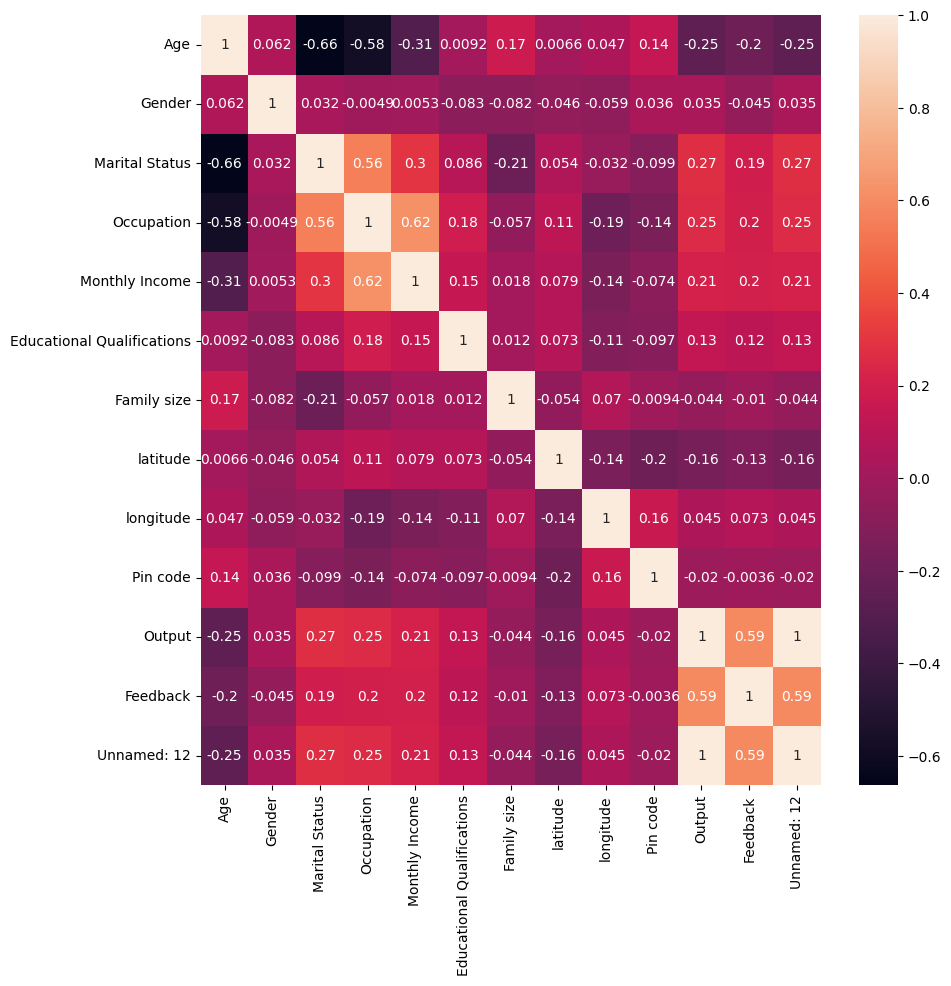

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [64]:
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,1,1,1
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,1,1,1
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,1,0,1
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,1,1,1
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,0,2,3,4,2,2,12.9766,77.5993,560001,1,1,1
384,23,0,2,3,4,2,4,12.9854,77.7081,560048,1,1,1
385,22,0,2,3,4,2,5,12.9850,77.5533,560010,1,1,1
386,23,1,2,3,2,2,2,12.9770,77.5773,560009,1,1,1


In [73]:
x=data.drop(['Occupation','Feedback','Output','Unnamed: 12','Pin code'],axis=1)
x

,Age,Gender,Marital Status,Monthly Income,Educational Qualifications,Family size,latitude,longitude
0,0.133333,0.0,1.0,1.0,0.5,0.6,0.470439,0.420073
1,0.400000,0.0,1.0,0.5,0.0,0.4,0.472128,0.339781
2,0.266667,1.0,1.0,0.5,0.5,0.4,0.379645,0.639051
3,0.266667,0.0,1.0,1.0,0.0,1.0,0.346706,0.282482
4,0.266667,1.0,1.0,0.5,0.5,0.6,0.505912,0.252190
...,...,...,...,...,...,...,...,...
383,0.333333,0.0,1.0,1.0,0.5,0.2,0.470439,0.420073
384,0.333333,0.0,1.0,1.0,0.5,0.6,0.507601,0.817153
385,0.266667,0.0,1.0,1.0,0.5,0.8,0.505912,0.252190
386,0.333333,1.0,1.0,0.5,0.5,0.2,0.472128,0.339781


<Axes: >

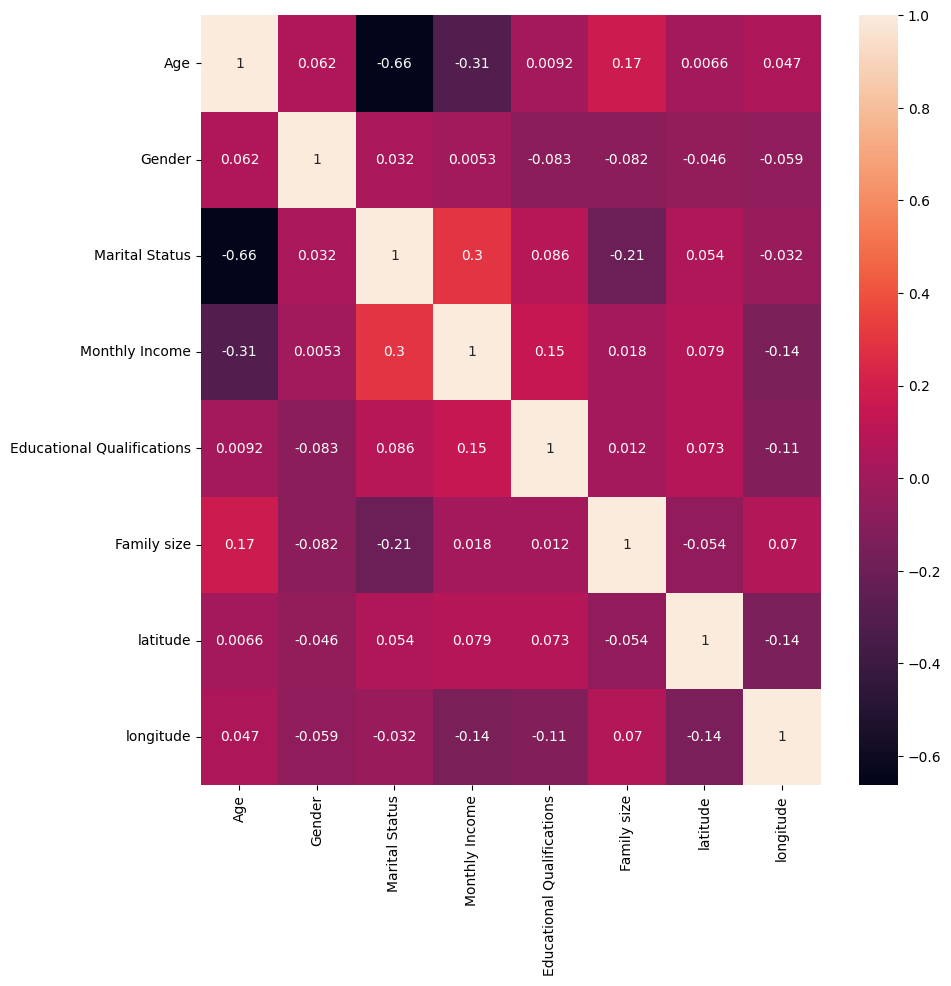

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(x.corr(),annot=True)

In [74]:
y=data['Output']

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [76]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [77]:
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [78]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 235, 0: 75})
SMOTE Classes Counter({1: 235, 0: 235})


### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_smote,y_smote)
y_predict=lr.predict(x_test)
y_pred_prob=lr.predict_proba(x_test)
y_pred_prob

array([[0.47078111, 0.52921889],
       [0.27590729, 0.72409271],
       [0.29000733, 0.70999267],
       [0.31635241, 0.68364759],
       [0.69455337, 0.30544663],
       [0.27881096, 0.72118904],
       [0.27407821, 0.72592179],
       [0.50785038, 0.49214962],
       [0.65570853, 0.34429147],
       [0.84147711, 0.15852289],
       [0.2918443 , 0.7081557 ],
       [0.71735655, 0.28264345],
       [0.45027366, 0.54972634],
       [0.35757387, 0.64242613],
       [0.32737355, 0.67262645],
       [0.53759735, 0.46240265],
       [0.13600062, 0.86399938],
       [0.72892035, 0.27107965],
       [0.28006413, 0.71993587],
       [0.22303173, 0.77696827],
       [0.22830601, 0.77169399],
       [0.26226283, 0.73773717],
       [0.13899981, 0.86100019],
       [0.71285401, 0.28714599],
       [0.31158111, 0.68841889],
       [0.33663321, 0.66336679],
       [0.31158111, 0.68841889],
       [0.63552577, 0.36447423],
       [0.16607027, 0.83392973],
       [0.42884397, 0.57115603],
       [0.

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.40      0.67      0.50        12
           1       0.93      0.82      0.87        66

    accuracy                           0.79        78
   macro avg       0.67      0.74      0.69        78
weighted avg       0.85      0.79      0.81        78



### DecisionTree

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier() 
dt.fit(x_smote,y_smote)
y_hat=dt.predict(x_test)
y_hat

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [86]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.97      0.95      0.96        66

    accuracy                           0.94        78
   macro avg       0.87      0.89      0.88        78
weighted avg       0.94      0.94      0.94        78



### Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_smote,y_smote)
y_predict=rf_clf.predict(x_test)

In [89]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71        12
           1       0.97      0.91      0.94        66

    accuracy                           0.90        78
   macro avg       0.80      0.87      0.83        78
weighted avg       0.92      0.90      0.90        78



### KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(n_neighbors=3)
KN.fit(x,y)
y_predict=KN.predict(x)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,

In [101]:
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.68      0.73        87
           1       0.91      0.95      0.93       301

    accuracy                           0.89       388
   macro avg       0.85      0.81      0.83       388
weighted avg       0.89      0.89      0.89       388

